# Session 8 further work

In [1]:
# We always start with appropriate imports; note the use of the IPython magic
# command to set up Matplotlib within the notebook
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## 3. Pseudo-random numbers

### Question 1

In [2]:
Natoms = 1000
tmax = 6000 # seconds
dt = 0.1      # seconds
Nt = int(tmax/dt)+1
t0 = np.zeros(4)
t0[0]  =  3.1*60/np.log(2.0) # Po 218
t0[1]  = 26.8*60/np.log(2.0) # Pb 214
t0[2]  = 19.9*60/np.log(2.0) # Bi 214
t0[3]  = 1e10                # Arbitrary - stable
pop = np.zeros((Nt,4))
pop[0,0] = Natoms
prob_decay = 1.0 - np.exp(-dt/t0)
for t in range(Nt-1):
    for atom in range(3,-1,-1):
        prob_samp = np.random.rand(int(np.rint(pop[t,atom]))) # Chance for atom to decay
        decay_total = np.sum(np.where(prob_samp<prob_decay[atom],1,0))
        pop[t+1,atom] = pop[t,atom] - decay_total
        if atom<3:
            pop[t+1,atom+1] += decay_total

Text(0.5, 1.0, 'Decay of sample of Po atoms')

/Users/dave/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


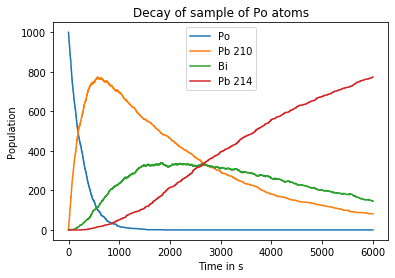

In [3]:
tarr = np.arange(0,tmax+dt,dt)
plt.plot(tarr,pop[:,0],label='Po')
plt.plot(tarr,pop[:,1],label='Pb 210')
plt.plot(tarr,pop[:,2],label='Bi')
plt.plot(tarr,pop[:,3],label='Pb 214')
plt.legend()
plt.xlabel("Time in s")
plt.ylabel("Population")
plt.title("Decay of sample of Po atoms")

### Question 2

In [4]:
side = 151
mid = 75
traj = np.zeros((side,side,side))
this_x = mid
this_y = mid
this_z = mid
traj[this_x,this_y,this_z] = 1
Nsteps = 10000
neigh = np.array([[-1,0,0],[1,0,0],[0,-1,0],[0,1,0],[0,0,-1],[0,0,1]])
line = np.zeros((Nsteps+1,3))
line[0] = np.array([this_x,this_y,this_z])
for i in range(Nsteps):
    # Pick neighbour
    neigh0 = np.random.randint(6)
    this_x += neigh[neigh0,0]
    this_y += neigh[neigh0,1]
    this_z += neigh[neigh0,2]
    # Periodic boundaries
    if(this_x>side-1):
        this_x -= 2
    if(this_y>side-1):
        this_y -= 2
    if(this_z>side-1):
        this_z -= 2
    if(this_x<0):
        this_x += 2
    if(this_y<0):
        this_y += 2
    if(this_z<0):
        this_z += 2
    traj[this_x,this_y,this_z] += 1
    line[i+1] = np.array([this_x,this_y,this_z])

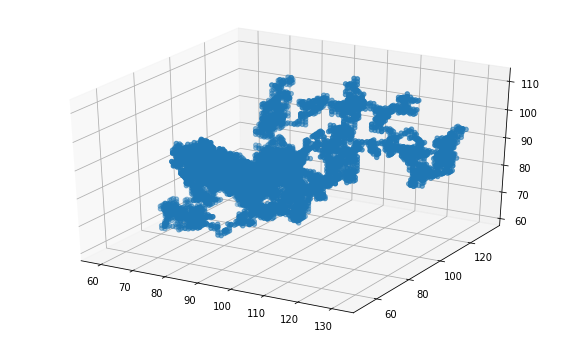

In [5]:
fig_3d_s3q2 = plt.figure(figsize=(10,6))
ax3d_s3q2 = fig_3d_s3q2.add_subplot(111,projection='3d')
ax3d_s3q2.scatter(line[:,0],line[:,1],line[:,2])

## 4. Probability distributions

### Question 1

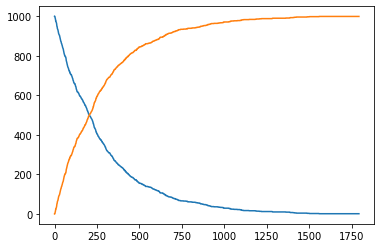

In [6]:
Natoms = 1000
tau_Tl = 3.053*60 # half-life in seconds
t0_Tl  = tau_Tl/np.log(2.0)
times = -t0_Tl * np.log(1-np.random.random(1000))
times_sorted = np.sort(times)
limit_sorted = int(np.max(times))+1
index = 0
NTl = np.zeros(limit_sorted)
NPb = np.zeros(limit_sorted)
NTl[0] = 1000
for time in range(1,limit_sorted): # dt = 1
    ndecayed = 0
    while times_sorted[index]<time:
        ndecayed += 1
        index += 1
    NTl[time] = NTl[time-1]-ndecayed
    NPb[time] = NPb[time-1]+ndecayed
plt.plot(NTl)
plt.plot(NPb)

### Question 2

In [7]:
def rejection_method_normal(n_samples,sigma,h):
    """Test rejection method with normal distribution for x with sd sigma, height h"""
    result = np.zeros(n_samples)
    n_accept = 0
    n_counts = 0
    for i in range(n_samples):
        reject = True
        while reject:
            n_counts +=1
            x = np.random.normal(scale=sigma)
            qx = h*np.exp(-x*x/(2.0*sigma*sigma))/np.sqrt(2.0*np.pi*sigma*sigma)
            px = (1+x*x)*np.exp(-0.5*x*x)/(2*np.sqrt(2*np.pi))
            testx = qx*np.random.random()
            if(testx<px):
                reject = False
                result[n_accept] = x
                n_accept += 1
    print("Ran ",n_counts," tests for ",n_samples," samples")
    return result

### Question 3

Ran  149889  tests for  100000  samples


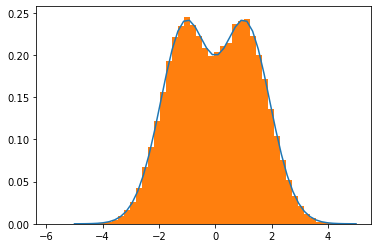

In [8]:
Nsamp = 100000
samp_gauss = rejection_method_normal(Nsamp,2.0,1.5)
xplot = np.linspace(-5,5)
xplot2 = xplot*xplot
targ = (1+xplot2)*np.exp(-0.5*xplot2)/(2*np.sqrt(2*np.pi))
plt.plot(xplot,(1+xplot2)*np.exp(-0.5*xplot2)/(2*np.sqrt(2*np.pi)))
a = plt.hist(samp_gauss,bins=50,density=True)

## 5. Monte Carlo methods

### Question 1

In [9]:
a = 2.0
b = 1.5
wx = 4.1
wy = 4.1
for Ntries in [1e3, 1e4, 1e5, 1e6,1e7]:
    Nacc   = 0.0
    for i in range(int(Ntries)):
        thisx = wx*np.random.random() - wx/2
        thisy = wy*np.random.random() - wy/2
        if thisx*thisx/(a*a) + thisy*thisy/(b*b) < 1.0:
            Nacc += 1
    print("Estimated area is ",wx*wy*Nacc/Ntries," error ",wx*wy*Nacc/Ntries-np.pi*a*b)
    print("Acceptance ratio: ",Nacc/Ntries)

Estimated area is  9.2455  error  -0.17927796076937952
Acceptance ratio:  0.55
Estimated area is  9.541356  error  0.11657803923062104
Acceptance ratio:  0.5676
Estimated area is  9.4288971  error  0.004119139230621016
Acceptance ratio:  0.56091
Estimated area is  9.43659608  error  0.011818119230619928
Acceptance ratio:  0.561368
Estimated area is  9.426844598999999  error  0.0020666382306195885
Acceptance ratio:  0.5607879


Now using a rectangle; this is more efficient but not hugely so.

In [10]:
a = 2.0
b = 1.5
wx = 4.1
wy = 3.1
for Ntries in [1e3, 1e4, 1e5, 1e6,1e7]:
    Nacc   = 0.0
    for i in range(int(Ntries)):
        thisx = wx*np.random.random() - wx/2
        thisy = wy*np.random.random() - wy/2
        if thisx*thisx/(a*a) + thisy*thisy/(b*b) < 1.0:
            Nacc += 1
    print("Estimated area is ",wx*wy*Nacc/Ntries," error ",wx*wy*Nacc/Ntries-np.pi*a*b)
    print("Acceptance ratio: ",Nacc/Ntries)

Estimated area is  9.45624  error  0.031462039230619965
Acceptance ratio:  0.744
Estimated area is  9.446072  error  0.021294039230619788
Acceptance ratio:  0.7432
Estimated area is  9.427515399999999  error  0.0027374392306196427
Acceptance ratio:  0.74174
Estimated area is  9.424795459999999  error  1.7499230619222317e-05
Acceptance ratio:  0.741526
Estimated area is  9.427118848  error  0.0023408872306198703
Acceptance ratio:  0.7417088


## 6. Monte Carlo simulations

### Question 1

In [11]:
def update(i,j):
    """Update move for MC Ising model"""
    im = (i-1)%boxlen
    ip = (i+1)%boxlen
    jm = (j-1)%boxlen
    jp = (j+1)%boxlen
    sum_neigh_spins = spins[im,j] + spins[ip,j] + spins[i,jm] + spins[i,jp]
    # The change in energy accounts for flip from -1 to +1 or vice versa
    de = 2*spins[i,j]*(J_over_kT*sum_neigh_spins + B_over_kT)
    p = np.exp(-de)
    if de<0 or p > np.random.random():
        spins[i,j] = -spins[i,j]
    else:
        de = 0.0
    return de

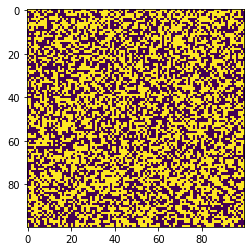

In [12]:
boxlen = 100
B_over_kT = 0.0
J_over_kT = 2.0
spins = (-1)**np.random.randint(0,2,size=(boxlen,boxlen))
plt.imshow(spins)

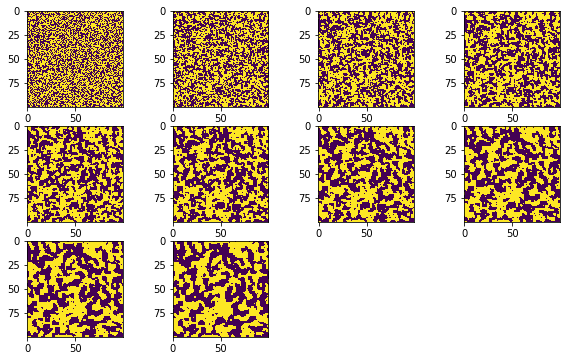

In [13]:
Nsteps = 50000
long_range_order = np.zeros(Nsteps+1)
long_range_order[0] = np.sum(spins)/np.size(spins)
etot = np.zeros(Nsteps+1)
sum_neigh_spins = (np.roll(spins,1,axis=0)+np.roll(spins,-1,axis=0)+
                   np.roll(spins,1,axis=1)+np.roll(spins,-1,axis=1))
etot[0] = -np.sum(spins*(B_over_kT + J_over_kT*sum_neigh_spins))
spin_total = 0
spin2_total = 0
figIsing = plt.figure(figsize=(10,6))
index = 1
for i in range(Nsteps):
    this_i = np.random.randint(boxlen)
    this_j = np.random.randint(boxlen)
    de = update(this_i,this_j)
    sum_neigh_spins = (np.roll(spins,1,axis=0)+np.roll(spins,-1,axis=0)+
                       np.roll(spins,1,axis=1)+np.roll(spins,-1,axis=1))
    etot[i+1] = -np.sum(spins*(B_over_kT + J_over_kT*sum_neigh_spins))
    long_range_order[i+1] = np.sum(spins)/np.size(spins)
    spin_total += np.sum(spins)/np.size(spins)
    spin2_total += np.sum(spins)*np.sum(spins)/(np.size(spins)*np.size(spins))
    if i%5000==0:
        ax = figIsing.add_subplot(3,4,index)
        ax.imshow(spins)
        index +=1 

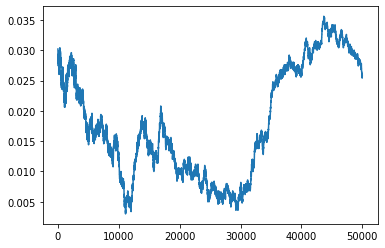

In [14]:
plt.plot(long_range_order)

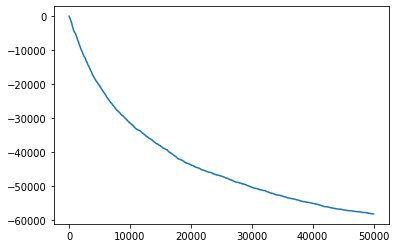

In [15]:
plt.plot(etot)

In [16]:
ave_spin = spin_total/(Nsteps)
sd_spin = np.sqrt(spin2_total/Nsteps - ave_spin*ave_spin)
print("Average spin: ",ave_spin," with SD ",sd_spin)

Average spin:  0.01800086399999951  with SD  0.009142037018824087


### Question 2

In [17]:
def func_min(x):
    """Function to be minimised: x^2 + cos(x) e^(0.1*(x-x^2))"""
    return 0.001*x*x + np.cos(x) * np.exp(0.1*(x - x*x))

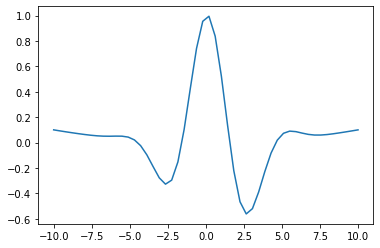

In [18]:
plotx = np.linspace(-10,10)
plt.plot(plotx,func_min(plotx))

In [19]:
temperature = 100
x = -5 + 2*np.random.random()-1
fx = func_min(x)
iters = 0
while temperature>0.01:
    iters += 1
    for i in range(1000):
        # Take a step
        dx = 2.0*np.random.random()-1
        fx_new = func_min(x+dx)
        df = fx_new - fx
        if df<0 or np.random.random()<np.exp(-df/temperature):
            x += dx
            fx = fx_new
    temperature *= 0.9
print("Minimum is at ",x," with value ",fx," after ",iters," steps")

Minimum is at  -2.648289777465151  with value  -0.3281531854057574  after  88  steps
